# Facebook advertising

### (A) Predicting the number of impressions based on the amount of spent money on Facebook advertising 

### (B) Predicting the number of Clicks based on the number of impressions 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the ols function
from statsmodels.formula.api import ols
# Import qqplot
from statsmodels.api import qqplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
ad_conversion = pd.read_csv("../data/ad_conversion.csv")
print(ad_conversion.head())

   spent_usd  n_impressions  n_clicks
0       1.43           7350         1
1       1.82          17861         2
2       1.25           4259         1
3       1.29           4133         1
4       4.77          15615         3


### (A) Predicting the number of impressions based on the amount of spent money on Facebook advertising 

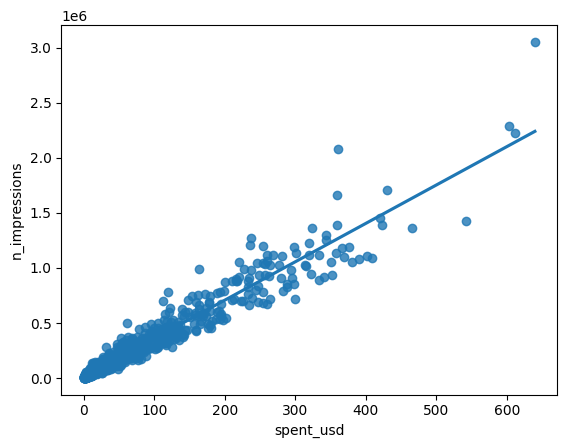

In [3]:
sns.regplot(
    x="spent_usd",
    y="n_impressions",
    data=ad_conversion,
    ci=None
)
plt.show()

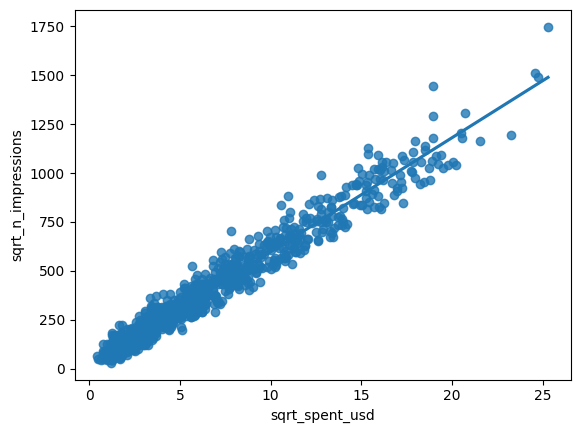

In [4]:
# Transforming the data
ad_conversion["sqrt_spent_usd"] = np.sqrt(ad_conversion["spent_usd"])
ad_conversion["sqrt_n_impressions"] = np.sqrt(ad_conversion["n_impressions"])

sns.regplot(
    x="sqrt_spent_usd",
    y="sqrt_n_impressions",
    data=ad_conversion,
    ci=None
)
plt.show()

In [5]:
# modeling and predicition

mdl_ad = ols("sqrt_n_impressions ~ sqrt_spent_usd", data=ad_conversion).fit()

explaratory_data = pd.DataFrame({
    "sqrt_spent_usd": np.sqrt(np.arange(0, 601, 100)),
    "spent_usd":np.arange(0, 601, 100)
})

prediction_data = explaratory_data.assign(
    sqrt_n_impressions= mdl_ad.predict(explaratory_data),
    n_impressions= mdl_ad.predict(explaratory_data) ** 2
)
print(prediction_data)

   sqrt_spent_usd  spent_usd  sqrt_n_impressions  n_impressions
0        0.000000          0           15.319713   2.346936e+02
1       10.000000        100          597.736582   3.572890e+05
2       14.142136        200          838.981547   7.038900e+05
3       17.320508        300         1024.095320   1.048771e+06
4       20.000000        400         1180.153450   1.392762e+06
5       22.360680        500         1317.643422   1.736184e+06
6       24.494897        600         1441.943858   2.079202e+06


### (B) Predicting the number of Clicks based on the number of impressions 

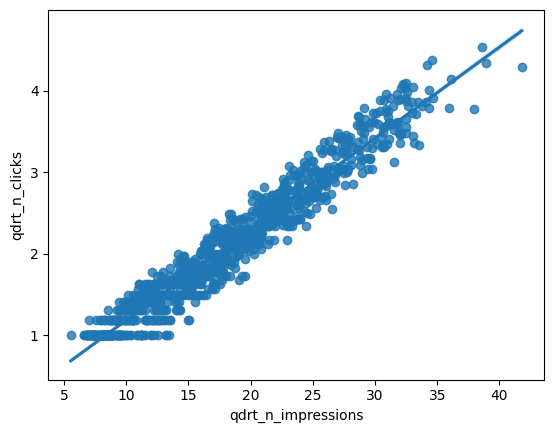

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


In [6]:
## Transforming the rsponse variable
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions'] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks'] ** 0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks',
data=ad_conversion)
plt.show()


ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

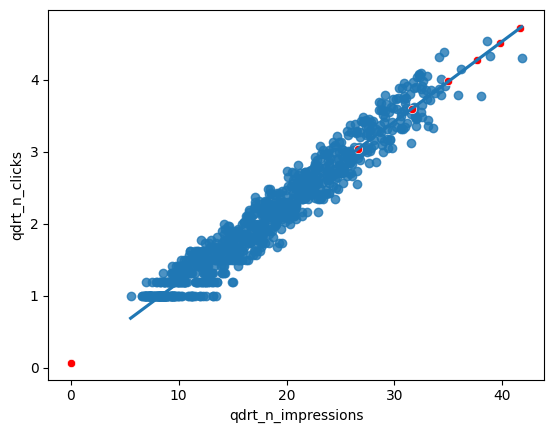

In [7]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=prediction_data, color='red')
plt.show()

In [8]:
# Coefficient of determination

# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression.summary())

# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression.rsquared)



                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:01:20   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

In [9]:
#Residual standard error
#Residual standard error (RSE) is a measure of the typical size of the residuals. 
#Equivalently, it's a measure of how wrong you can expect predictions to be. 
#Smaller numbers are better, with zero being a perfect fit to the data.

# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_ad.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)




RSE of original model:  58.37823293979714
RSE of transformed model:  0.19690640896875725
